In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Load Dataset**

In [24]:
df = pd.read_csv("kidney_disease.csv")

In [25]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


**EDA**

In [26]:
df.shape

(400, 26)

In [27]:
df.drop('id',axis=1, inplace=True)

In [28]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
            'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
            'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
            'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
             'aanemia', 'class']

In [29]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [31]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [32]:
#distribution of output column
df['class'].value_counts()

,count
class,
ckd,248
notckd,150
ckd\t,2


In [33]:
# changing data type of column
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [35]:
# separating categorical and numerical columns

cols=df.columns
cat_cols=[c for c in cols if df[c].dtype=='object']
num_cols=[c for c in cols if df[c].dtype!='object']

In [36]:
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [37]:
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [38]:
# checking all the unique value for each column
for c in cat_cols:
    print(f"{c} : {df[c].unique()}")


red_blood_cells : [nan 'normal' 'abnormal']
pus_cell : ['normal' 'abnormal' nan]
pus_cell_clumps : ['notpresent' 'present' nan]
bacteria : ['notpresent' 'present' nan]
hypertension : ['yes' 'no' nan]
diabetes_mellitus : ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary_artery_disease : ['no' 'yes' '\tno' nan]
appetite : ['good' 'poor' nan]
peda_edema : ['no' 'yes' nan]
aanemia : ['no' 'yes' nan]
class : ['ckd' 'ckd\t' 'notckd']


In [44]:
# replace (/t) values
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace('\tno','no')
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace({'\tyes':'yes','\tno':'no',' yes':'yes'})
df['class'] = df['class'].replace({'ckd\t':'ckd','notckd':'not ckd'})

In [45]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']
for col in cols:
    print(f"{col} : {df[col].unique()}")

diabetes_mellitus : ['yes' 'no' nan]
coronary_artery_disease : ['no' 'yes' nan]
class : ['ckd' 'not ckd']


In [46]:
df['class'] = df['class'].replace({'ckd':0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors = 'coerce')

<ipython-input-46-982510c96b88>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({'ckd':0, 'not ckd': 1})


In [51]:
df['class'].value_counts()

,count
class,
0,250
1,150


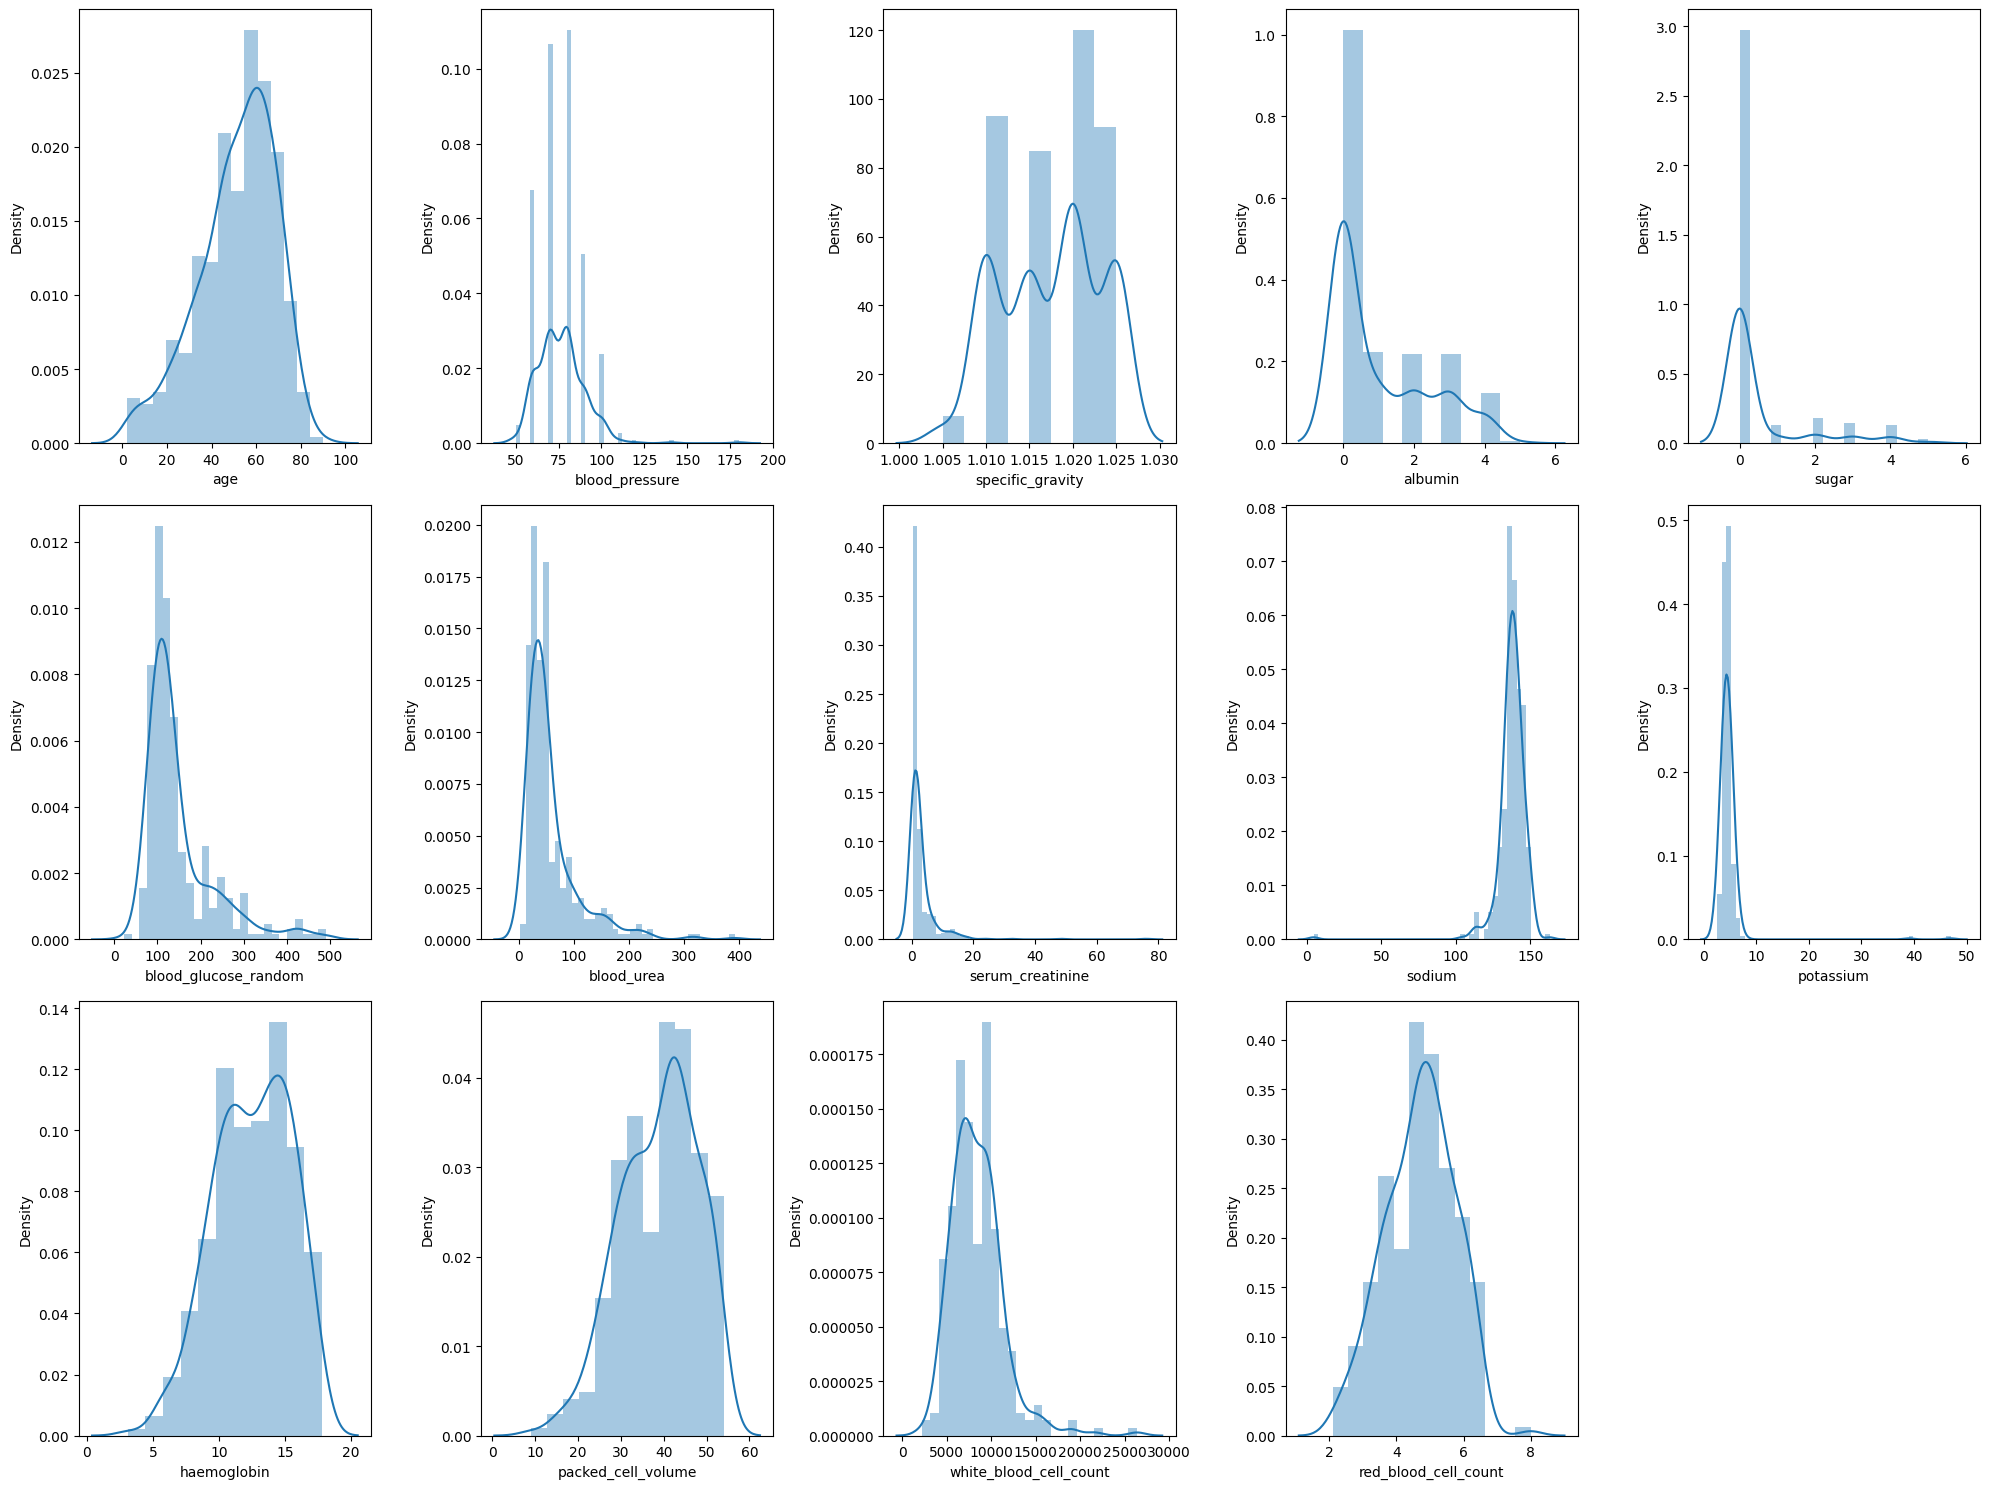

In [55]:
# distribution of numerical columns
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
       ax = plt.subplot(3, 5, plotnumber)
       sns.distplot(df[column])
       plt.xlabel(column)

    plotnumber += 1
plt.tight_layout()
plt.show()

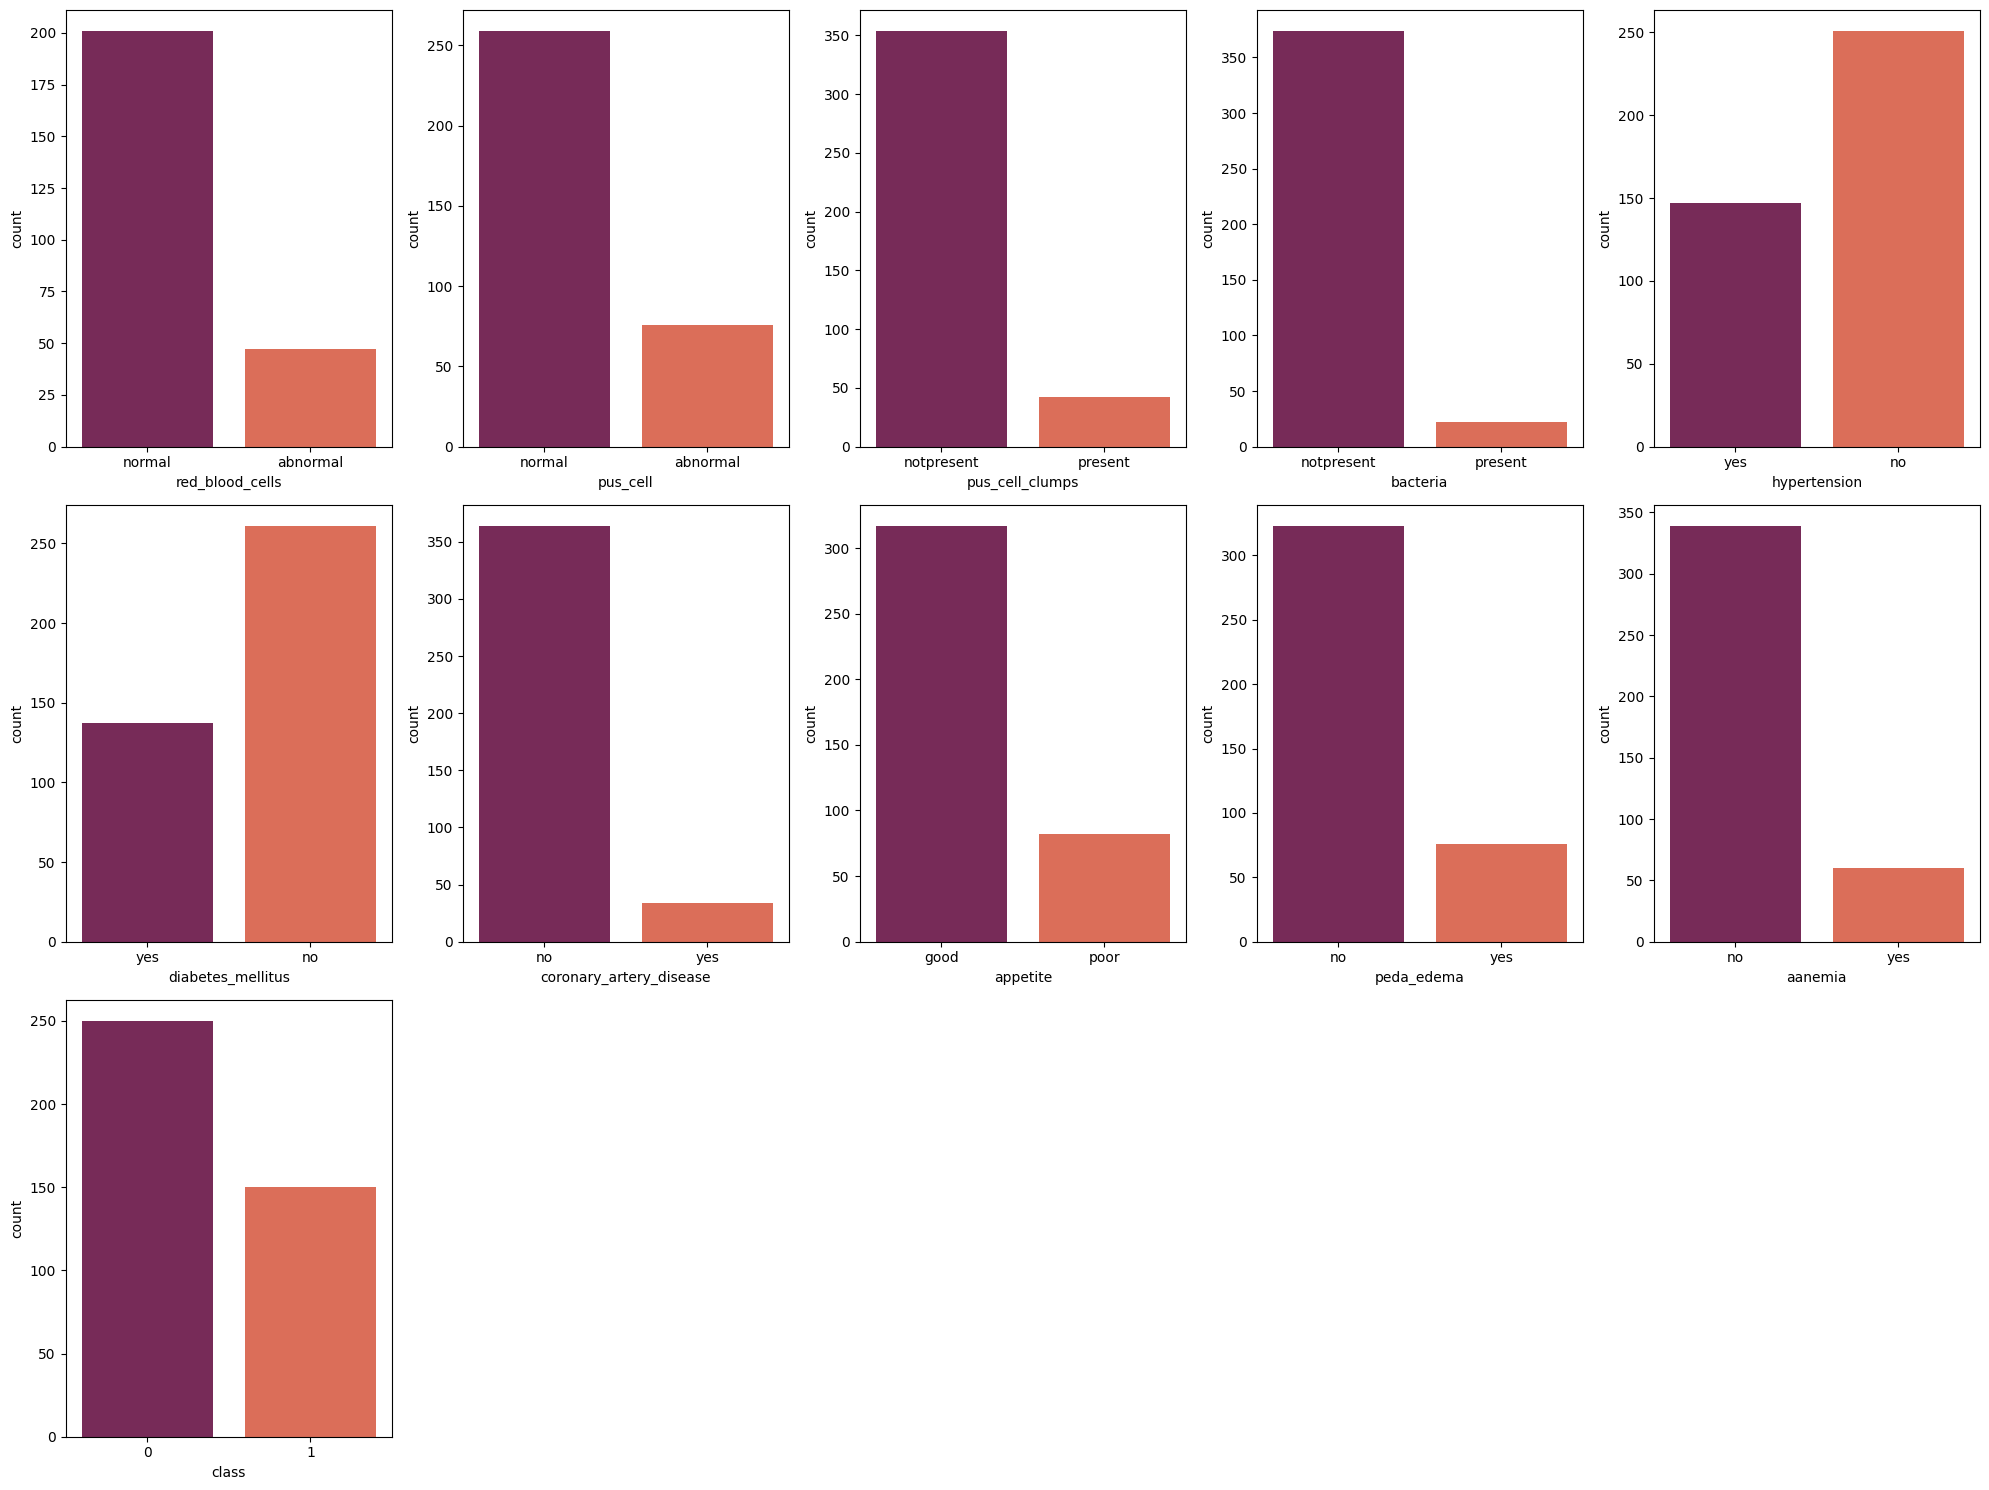

In [60]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
   if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.countplot(x=df[column] ,palette = 'rocket')
        plt.xlabel(column)
   plotnumber += 1

plt.tight_layout()
plt.show()

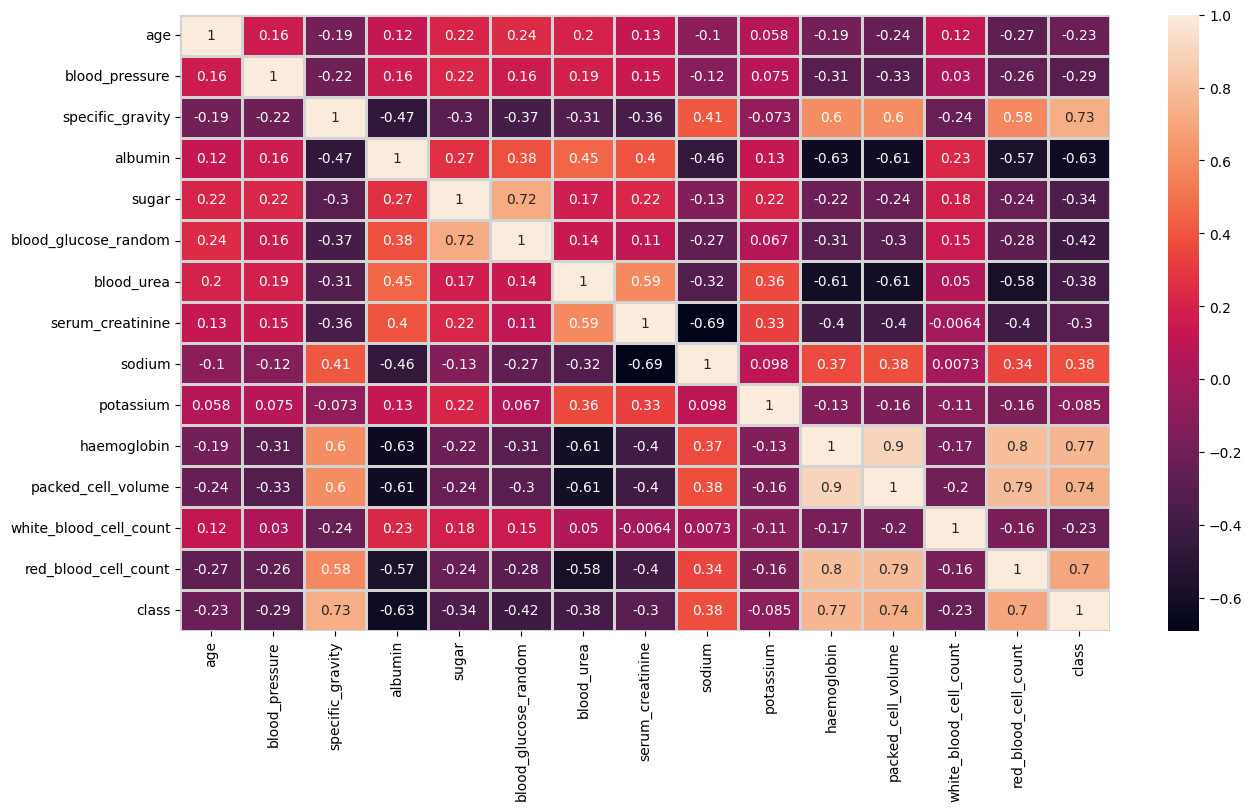

In [63]:
# correlation
plt.figure(figsize = (15,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, linewidth=2, linecolor = 'lightgray')
plt.show()

**Data Preprocessing**

In [65]:
#checking null values
df.isnull().sum()

,0
age,9
blood_pressure,12
specific_gravity,47
albumin,46
sugar,49
red_blood_cells,152
pus_cell,65
pus_cell_clumps,4
bacteria,4
blood_glucose_random,44


In [68]:
df[num_cols].isnull().sum()

,0
age,9
blood_pressure,12
specific_gravity,47
albumin,46
sugar,49
blood_glucose_random,44
blood_urea,19
serum_creatinine,17
sodium,87
potassium,88


In [72]:

df[cat_cols].isnull().sum()

,0
red_blood_cells,152
pus_cell,65
pus_cell_clumps,4
bacteria,4
hypertension,2
diabetes_mellitus,2
coronary_artery_disease,2
appetite,1
peda_edema,1
aanemia,1


In [69]:
#filling missing values
#for higher missing value use Random Sampling
#for lower missing value use mean/mode

In [70]:
def random_sampling(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum()) #dropping null value then picking any random sample vlue
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

In [71]:
def impute_mode(feature):
      mode = df[feature].mode()[0]
      df[feature] = df[feature].fillna(mode)

In [73]:
# random sampling for numerical value
for col in num_cols:
      random_sampling(col)

In [74]:
df[num_cols].isnull().sum()

,0
age,0
blood_pressure,0
specific_gravity,0
albumin,0
sugar,0
blood_glucose_random,0
blood_urea,0
serum_creatinine,0
sodium,0
potassium,0


In [76]:
# in categorical colum RBC and Puss cell has high value so using random sampling
random_sampling('red_blood_cells')
random_sampling('pus_cell')

# for rest mode imputation
for col in cat_cols:
      impute_mode(col)

In [77]:
df[cat_cols].isnull().sum()

,0
red_blood_cells,0
pus_cell,0
pus_cell_clumps,0
bacteria,0
hypertension,0
diabetes_mellitus,0
coronary_artery_disease,0
appetite,0
peda_edema,0
aanemia,0


In [79]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [80]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,109.0,...,38.0,6000.0,3.4,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.7,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


**Model Building**

In [81]:
X = df.drop('class', axis = 1)
y = df['class']

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.2, random_state = 0)

In [84]:
#KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Testing Accuracy of KNN is {accuracy_score(y_test, knn.predict(X_test))}")

print(f"Confusion Matrix of KNN is \n {confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report of KNN is \n{classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.7625
Testing Accuracy of KNN is 0.775
Confusion Matrix of KNN is 
 [[38 14]
 [ 4 24]]

Classification Report of KNN is 
              precision    recall  f1-score   support

           0       0.90      0.73      0.81        52
           1       0.63      0.86      0.73        28

    accuracy                           0.78        80
   macro avg       0.77      0.79      0.77        80
weighted avg       0.81      0.78      0.78        80



In [85]:
# Decision Tree

In [114]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(f"Training Accuracy of DTC is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Testing Accuracy of DTC is {accuracy_score(y_test, dtc.predict(X_test))}")

print(f"Confusion Matrix of DTC is \n {confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report of DTC is \n{classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of DTC is 1.0
Testing Accuracy of DTC is 0.9625
Confusion Matrix of DTC is 
 [[51  1]
 [ 2 26]]

Classification Report of DTC is 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.96      0.93      0.95        28

    accuracy                           0.96        80
   macro avg       0.96      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



In [88]:
# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV

GRID_PARAMETER = {
    'criterion':['gini','entropy'],
     'max_depth':[3,5,7,10],
     'splitter':['best','random'],
     'min_samples_leaf':[1,2,3,5,7],
     'min_samples_split':[1,2,3,5,7],
     'max_features':['auto', 'sqrt', 'log2']
          }
grid_search_dtc = GridSearchCV(dtc, GRID_PARAMETER, cv=5, n_jobs=-1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [89]:
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 7, 'splitter': 'best'}
0.978125


In [90]:
dtc = grid_search_dtc.best_estimator_

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(f"Training Accuracy of DTC is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Testing Accuracy of DTC is {accuracy_score(y_test, dtc.predict(X_test))}")

print(f"Confusion Matrix of DTC is \n {confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report of DTC is \n{classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of DTC is 0.978125
Testing Accuracy of DTC is 0.9625
Confusion Matrix of DTC is 
 [[52  0]
 [ 3 25]]

Classification Report of DTC is 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        52
           1       1.00      0.89      0.94        28

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



In [91]:
# Random Forest Classifier

In [92]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = "gini", max_depth = 10, max_features="sqrt", min_samples_leaf= 1, min_samples_split= 7, n_estimators = 400)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=400)

In [93]:
rand_clf_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(f"Training Accuracy of Random Forest is {accuracy_score(y_train, rand_clf.predict(X_train))}")
print(f"Testing Accuracy of Random Forest is {accuracy_score(y_test, rand_clf.predict(X_test))}")

print(f"Confusion Matrix of Random Forest is \n {confusion_matrix(y_test, rand_clf.predict(X_test))}\n")
print(f"Classification Report of Random Forest is \n{classification_report(y_test, rand_clf.predict(X_test))}")

Training Accuracy of Random Forest is 0.996875
Testing Accuracy of Random Forest is 0.975
Confusion Matrix of Random Forest is 
 [[52  0]
 [ 2 26]]

Classification Report of Random Forest is 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      0.93      0.96        28

    accuracy                           0.97        80
   macro avg       0.98      0.96      0.97        80
weighted avg       0.98      0.97      0.97        80



In [94]:
#logistic regression

In [95]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [96]:
lr_acc = accuracy_score(y_test, lr.predict(X_test))
print(f"Training Accuracy of LR is {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Testing Accuracy of LR is {accuracy_score(y_test, lr.predict(X_test))}")

print(f"Confusion Matrix of LR is \n {confusion_matrix(y_test, lr.predict(X_test))}\n")
print(f"Classification Report of LR is \n{classification_report(y_test, lr.predict(X_test))}")

Training Accuracy of LR is 0.90625
Testing Accuracy of LR is 0.875
Confusion Matrix of LR is 
 [[46  6]
 [ 4 24]]

Classification Report of LR is 
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        52
           1       0.80      0.86      0.83        28

    accuracy                           0.88        80
   macro avg       0.86      0.87      0.86        80
weighted avg       0.88      0.88      0.88        80



In [102]:
#SVM

In [101]:
from sklearn.svm import SVC
svm  = SVC(probability=True)

parameter = {
    'gamma':[0.0001, 0.001, 0.01, 0.1],
        'C':[0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
        }
grid_search = GridSearchCV(svm, parameter)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [103]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'gamma': 0.0001}
0.746875


In [104]:
svm  = SVC(gamma = 0.0001, C  = 15, probability=True)
svm.fit(X_train, y_train)

SVC(C=15, gamma=0.0001, probability=True)

In [105]:
svm_acc = accuracy_score(y_test, svm.predict(X_test))
print(f"Training Accuracy of SVC is {accuracy_score(y_train, svm.predict(X_train))}")
print(f"Testing Accuracy of SVC is {accuracy_score(y_test, svm.predict(X_test))}")

print(f"Confusion Matrix of SVC is \n {confusion_matrix(y_test, svm.predict(X_test))}\n")

Training Accuracy of SVC is 0.99375
Testing Accuracy of SVC is 0.7375
Confusion Matrix of SVC is 
 [[41 11]
 [10 18]]



In [106]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

PARAMETERS = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate':[0.001, 0.1, 1, 10],
    'n_estimators':[100,150,180, 200]
            }
grid_search_gbc = GridSearchCV(gbc, PARAMETERS, cv=5, n_jobs=-1, verbose= 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['log_loss', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [107]:
print(grid_search_gbc.best_params_)
print(grid_search_gbc.best_score_)

{'learning_rate': 1, 'loss': 'log_loss', 'n_estimators': 150}
0.971875


In [108]:
gbc = GradientBoostingClassifier(learning_rate= 0.1, loss = 'log_loss', n_estimators = 100)
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [109]:
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(f"Training Accuracy of GBC is {accuracy_score(y_train, gbc.predict(X_train))}")
print(f"Testing Accuracy of GBC is {accuracy_score(y_test, gbc.predict(X_test))}")

print(f"Confusion Matrix of GBC is \n {confusion_matrix(y_test, gbc.predict(X_test))}\n")
print(f"Classification Report of GBC is \n{classification_report(y_test, gbc.predict(X_test))}")

Training Accuracy of GBC is 1.0
Testing Accuracy of GBC is 0.9875
Confusion Matrix of GBC is 
 [[52  0]
 [ 1 27]]

Classification Report of GBC is 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.96      0.98        28

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



**ModelComparision**

In [115]:
models = pd.DataFrame({
      'Model':['Logistic Regression', 'KNN', 'SVM', 'DT', 'Random Forest Classifier','Gradient Boosting'],
       'Score':[lr_acc, knn_acc, svm_acc, dtc_acc, rand_clf_acc, gbc_acc]
          })

models.sort_values(by='Score', ascending = False)


,Model,Score
5,Gradient Boosting,0.9875
4,Random Forest Classifier,0.9750
3,DT,0.9625
0,Logistic Regression,0.8750
1,KNN,0.7750
2,SVM,0.7375


**Pickle File**

In [117]:
import pickle
pickle.dump(gbc, open('kidney_model.pkl', 'wb'))